In [1]:
## import important libaries
import numpy as np
import pandas as pd
from sklearn import svm, metrics,preprocessing
from sklearn.neighbors import KNeighborsClassifier
#from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc,classification_report
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
# import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

In [2]:
path="/home/sultan/EEG/Source_level_frequency_analysis/100_base_corr_sam_NHIerp_band_features_noise.csv"
## the below one is the band_features
##path="/home/sultan/EEG/Source_level_frequency_analysis/100sam_NHIerp_band_features_clear.csv"
# path="/home/sultan/EEG/Source_level_frequency_analysis/100sam_NHIerp_band_features_noise.csv"
dataset =pd.read_csv(path)

In [3]:
Xc=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(Xc)

In [30]:
tt='_knn'
rs=70

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=rs) 

In [32]:
X_test.shape, y_test.shape

((361, 272), (361,))

In [33]:
np.unique(y_test)
np.unique(y_test,return_counts=True)

(array([0., 1.]), array([143, 218]))

In [ ]:
### This is the line for finding the optimal value of k [Resources](https://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=rs) 
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)
# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)
### The below lines for plot
# plt.plot(k_range, scores,'r', linewidth=2)
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Testing Accuracy')

[0.9168975069252078, 0.8836565096952909, 0.9473684210526315, 0.9279778393351801, 0.9362880886426593, 0.9279778393351801, 0.925207756232687, 0.925207756232687, 0.9224376731301939, 0.9141274238227147, 0.9085872576177285, 0.9058171745152355, 0.9002770083102493, 0.9058171745152355, 0.8947368421052632, 0.8975069252077562, 0.8975069252077562, 0.9002770083102493, 0.9085872576177285, 0.9030470914127424, 0.8919667590027701, 0.8864265927977839, 0.8947368421052632, 0.889196675900277, 0.8947368421052632]


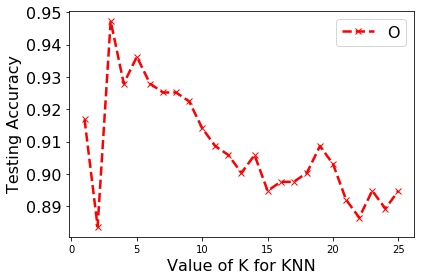

In [37]:
axis_font = {'fontname':'Arial', 'size':'16'}
plt.plot(k_range, scores,'--r',linewidth=2.5,marker='x')
plt.xlabel('Value of K for KNN',**axis_font)
plt.ylabel('Testing Accuracy',**axis_font)
plt.yticks(**axis_font)
plt.gca().legend(('Optimal k'),fontsize=16,loc='best')
plt.tight_layout()
plt.show()

### KNN 

In [10]:
clfknn = KNeighborsClassifier(n_neighbors=5)
clfknn.fit(X_train, y_train)
predk=clfknn.predict(X_test)
acck=clfknn.score(X_test, y_test)
print ("Accuracy:", acck)  
print(confusion_matrix(y_test, predk))
print(classification_report(y_test, predk))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predk)
roc_auck = auc(false_positive_rate, true_positive_rate)
print ('roc',roc_auck)

('Accuracy:', 0.9362880886426593)
[[132  11]
 [ 12 206]]
             precision    recall  f1-score   support

        0.0       0.92      0.92      0.92       143
        1.0       0.95      0.94      0.95       218

avg / total       0.94      0.94      0.94       361

('roc', 0.9340155257586451)


### Whole brain accuracy and AUC

In [11]:
whc=pd.DataFrame([acck,roc_auck])
whc

,0
0,0.936288
1,0.934016


In [12]:
## whole brain level analysis
# whc=pd.DataFrame([acc,roc_auc,acck,roc_auck])
# whc

In [13]:
# cv=5
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1],'gamma':[0.01 ]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

In [14]:
# X.shape
# np.max(acgw)

##### KNN Hemisphere

In [15]:
k=0;j=68; acgkw=[];
for i in range(0,4):
    clfknnw = KNeighborsClassifier(n_neighbors=5)
    clfknnw.fit(X_train[:,k:j], y_train)
    predkw=clfknnw.predict(X_test[:,k:j])
    acckw=clfknnw.score(X_test[:,k:j], y_test)
    acgkw=np.append(acgkw,acckw)
    print acckw
    print k,j
    print(classification_report(y_test, predkw))
    k=k+68;j=j+68;

0.8393351800554016
0 68
             precision    recall  f1-score   support

        0.0       0.80      0.79      0.80       143
        1.0       0.86      0.87      0.87       218

avg / total       0.84      0.84      0.84       361

0.8421052631578947
68 136
             precision    recall  f1-score   support

        0.0       0.81      0.78      0.80       143
        1.0       0.86      0.88      0.87       218

avg / total       0.84      0.84      0.84       361

0.9058171745152355
136 204
             precision    recall  f1-score   support

        0.0       0.86      0.91      0.88       143
        1.0       0.94      0.90      0.92       218

avg / total       0.91      0.91      0.91       361

0.9335180055401662
204 272
             precision    recall  f1-score   support

        0.0       0.94      0.89      0.91       143
        1.0       0.93      0.96      0.95       218

avg / total       0.93      0.93      0.93       361



In [16]:
acgkw

array([0.83933518, 0.84210526, 0.90581717, 0.93351801])

# Hemisphere

### LH

### Knnlh Hemisphere

In [17]:
a=range(0,(X.shape[1]),2)
d11=X[:,a];
X_train, X_test, y_train, y_test = train_test_split(d11,y, test_size=.20, random_state=rs) 
clfknnlh = KNeighborsClassifier(n_neighbors=5)
clfknnlh.fit(X_train, y_train)
predklh=clfknnlh.predict(X_test)
accklh=clfknnlh.score(X_test, y_test)
print ("Accuracy:", accklh)  
print(confusion_matrix(y_test, predklh))
print(classification_report(y_test, predklh))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predklh)
roc_aucklh = auc(false_positive_rate, true_positive_rate)
print ('roc',roc_aucklh)

('Accuracy:', 0.8781163434903048)
[[127  16]
 [ 28 190]]
             precision    recall  f1-score   support

        0.0       0.82      0.89      0.85       143
        1.0       0.92      0.87      0.90       218

avg / total       0.88      0.88      0.88       361

('roc', 0.8798357605697055)


In [18]:
lhacau=pd.DataFrame([accklh,roc_aucklh])
lhacau

,0
0,0.878116
1,0.879836


In [19]:
# only 34 features 
k=0;j=34; acgklh=[];
for i in range(0,4):
    clfknnlh = KNeighborsClassifier(n_neighbors=5)
    clfknnlh.fit(X_train[:,k:j], y_train)
    predklh=clfknnlh.predict(X_test[:,k:j])
    accklh=clfknnlh.score(X_test[:,k:j], y_test)
    acgklh=np.append(acgklh,accklh)
    print ('Acc:',accklh)
    print k,j
    print(classification_report(y_test, predklh))
    k=k+34;j=j+34;

('Acc:', 0.7839335180055401)
0 34
             precision    recall  f1-score   support

        0.0       0.74      0.69      0.72       143
        1.0       0.81      0.84      0.83       218

avg / total       0.78      0.78      0.78       361

('Acc:', 0.8033240997229917)
34 68
             precision    recall  f1-score   support

        0.0       0.76      0.73      0.75       143
        1.0       0.83      0.85      0.84       218

avg / total       0.80      0.80      0.80       361

('Acc:', 0.8337950138504155)
68 102
             precision    recall  f1-score   support

        0.0       0.80      0.77      0.79       143
        1.0       0.85      0.88      0.86       218

avg / total       0.83      0.83      0.83       361

('Acc:', 0.889196675900277)
102 136
             precision    recall  f1-score   support

        0.0       0.88      0.84      0.86       143
        1.0       0.90      0.92      0.91       218

avg / total       0.89      0.89      0.89       361


In [20]:
# acgklh

In [21]:
## 

### RH

# knnrh

In [22]:
# rss=20
a=range(1,(X.shape[1]),2)
d11=X[:,a];
X_train, X_test, y_train, y_test = train_test_split(d11,y, test_size=.20, random_state=rs)
# X_train, X_test, y_train, y_test = train_test_split(d11,y, test_size=.20, random_state=rss) 
clfknnrh = KNeighborsClassifier(n_neighbors=5)
clfknnrh.fit(X_train, y_train)
predkrh=clfknnrh.predict(X_test)
acckrh=clfknnrh.score(X_test, y_test)
print ("Accuracy:", acckrh)  
print(confusion_matrix(y_test, predkrh))
print(classification_report(y_test, predkrh))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predkrh)
roc_auckrh = auc(false_positive_rate, true_positive_rate)
print ('roc',roc_auckrh)

('Accuracy:', 0.9168975069252078)
[[126  17]
 [ 13 205]]
             precision    recall  f1-score   support

        0.0       0.91      0.88      0.89       143
        1.0       0.92      0.94      0.93       218

avg / total       0.92      0.92      0.92       361

('roc', 0.9107429267979728)


In [23]:
rhacau=pd.DataFrame([acckrh,roc_auckrh])
rhacau

,0
0,0.916898
1,0.910743


In [24]:
# only 34 features 
k=0;j=34; acgkrh=[];
for i in range(0,4):
    clfknnrh = KNeighborsClassifier(n_neighbors=5)
    clfknnrh.fit(X_train[:,k:j], y_train)
    predkrh=clfknnrh.predict(X_test[:,k:j])
    acckrh=clfknnrh.score(X_test[:,k:j], y_test)
    acgkrh=np.append(acgkrh,acckrh)
    print ('acc:',acckrh)
    print k,j
    print(classification_report(y_test, predkrh))
    k=k+34;j=j+34;

('acc:', 0.7922437673130194)
0 34
             precision    recall  f1-score   support

        0.0       0.76      0.70      0.73       143
        1.0       0.81      0.85      0.83       218

avg / total       0.79      0.79      0.79       361

('acc:', 0.817174515235457)
34 68
             precision    recall  f1-score   support

        0.0       0.76      0.78      0.77       143
        1.0       0.86      0.84      0.85       218

avg / total       0.82      0.82      0.82       361

('acc:', 0.8670360110803325)
68 102
             precision    recall  f1-score   support

        0.0       0.82      0.85      0.83       143
        1.0       0.90      0.88      0.89       218

avg / total       0.87      0.87      0.87       361

('acc:', 0.9168975069252078)
102 136
             precision    recall  f1-score   support

        0.0       0.92      0.86      0.89       143
        1.0       0.91      0.95      0.93       218

avg / total       0.92      0.92      0.92       361


In [25]:
# t=np.linspace(0,3,4, endpoint=True)
# time=pd.DataFrame(t)
# # a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgl),pd.DataFrame(acgr)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])
# a=pd.concat([time,pd.DataFrame(acgkw),pd.DataFrame(acgklh),pd.DataFrame(acgkrh)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])

In [26]:
t=np.linspace(0,3,4, endpoint=True)
time=pd.DataFrame(t)
# a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgl),pd.DataFrame(acgr)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])
a=pd.concat([time,pd.DataFrame(acgkw),pd.DataFrame(acgkrh),pd.DataFrame(acgklh)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])

In [27]:
# np.max(acgklh)
np.max(a.iloc[:,3])

0.889196675900277

In [28]:
# wpath="/home/sultan/EEG/Source_level_frequency_analysis/Results/"
# dall=a
# # dall.to_csv(wpath+'svm_res_100sam_10ms_clear_v1.csv')
# dall.to_csv(wpath+'svm_res_band_100sam_clear_v1.csv')

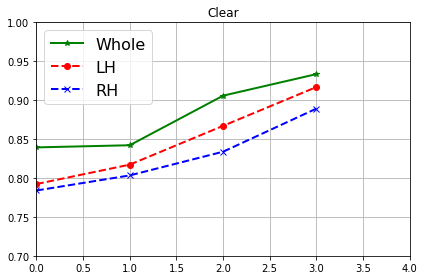

In [29]:
axis_font = {'fontname':'Arial', 'size':'15'}
#tw1=tad.iloc[1:,0];Acdw1=tad.iloc[1:,1];
tw1=a.iloc[0:,0];Acdw=a.iloc[0:,1];Acdlh=a.iloc[0:,2];Acdrh=a.iloc[0:,3]
# plt.plot(tw1,Acdw1,c='g')
plt.plot(tw1,Acdw,'g',linewidth=2,marker='*')
plt.plot(tw1, Acdlh,'--r',linewidth=2,marker='o')
plt.plot(tw1, Acdrh,'--b',linewidth=2,marker='x')
plt.title("Clear")
plt.xlim(0,4)
plt.ylim(0.7,1)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('Whole','LH','RH'),fontsize=16,loc='best')
# plt.savefig('whole_acc_timem.eps')
# plt.savefig('whole_acc_timem.tif')
plt.show()

In [35]:
## Ffe: Fulll features altogether
Ffe=pd.concat([whc,lhacau,rhacau],axis=1, keys=[ "Whole", "LH", "RH"])
Ffe

,Whole,LH,RH
,0,0,0
0,0.936288,0.916898,0.878116
1,0.934016,0.910743,0.879836


In [36]:
## bb: is the sub band frequency
bb=a.iloc[:,1:]

In [37]:
## Here the 1st and 2nd rows are accand roc for full brain
## Here from 3rd row theta,alpha beta,and gamma
# wrpath="/home/sultan/EEG/Source_level_frequency_analysis/Results/"
bandallclean=pd.concat([Ffe*100,bb*100],axis=0)
# # bandallclean.iloc[0:,:]
bandallclean
# bandallclean.to_csv(wrpath+str(rs)+'Clear_band.csv')

,Whole,LH,RH
,0,0,0
0,93.628809,91.689751,87.811634
1,93.401553,91.074293,87.983576
0,83.933518,79.224377,78.393352
1,84.210526,81.717452,80.332410
2,90.581717,86.703601,83.379501
3,93.351801,91.689751,88.919668


#### Writing into a csv file

In [40]:
# wrpath="/home/sultan/EEG/Source_level_frequency_analysis/Results/"
# bandallclean=pd.concat([Ffe*100,bb*100],axis=0)
# # bandallclean.iloc[0:,:]
# bandallclean
# bandallclean.to_csv(wrpath+str(rs)+tt+'_Noise_band.csv')
# wrpath+str(rs)+tt+'_Noise_band.csv'

'/home/sultan/EEG/Source_level_frequency_analysis/Results/70_knn_Noise_band.csv'

In [38]:
rs

70